 Link dataset : https://www.kaggle.com/datasets/utkarshsaxenadn/car-vs-bike-classification-dataset

# Mengimport library yang akan digunakan

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Memuat dataset

In [25]:
img_path = 'C:\\Users\\USER\\Documents\\Kecerdasan Buatan\\Posttest_KB_7\\Car-Bike-Dataset'
os.listdir(img_path)

['Bike', 'Car', 'test', 'train', 'validation']

# Split dataset

In [ ]:

#Split dataset
train_ratio = 0.7  # 70% data train
val_ratio = 0.15   # 15% data validation
test_ratio = 0.15  # 15% data test

#Direktori untuk masing-masing bagian dataset
train_dir = os.path.join(img_path, 'train')
validation_dir = os.path.join(img_path, 'validation')
test_dir = os.path.join(img_path, 'test')

if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(validation_dir):
    os.makedirs(validation_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

#Bagi dataset menjadi train, validation, dan test dengan menggunakan train_test_split
bike_dir = os.path.join(img_path, 'Bike')
car_dir = os.path.join(img_path, 'Car')

bike_filenames = [os.path.join(bike_dir, fname) for fname in os.listdir(bike_dir)]
car_filenames = [os.path.join(car_dir, fname) for fname in os.listdir(car_dir)]

bike_train, bike_temp = train_test_split(bike_filenames, train_size=train_ratio, random_state=42)
bike_val, bike_test = train_test_split(bike_temp, test_size=0.5, random_state=42)

car_train, car_temp = train_test_split(car_filenames, train_size=train_ratio, random_state=42)
car_val, car_test = train_test_split(car_temp, test_size=0.5, random_state=42)

#Memindahkan file ke direktori train, validation, dan test
def move_files(source_filenames, target_dir):
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)
    for fname in source_filenames:
        target_path = os.path.join(target_dir, os.path.basename(fname))
        os.replace(fname, target_path)

move_files(bike_train, os.path.join(train_dir, 'Bike'))
move_files(bike_val, os.path.join(validation_dir, 'Bike'))
move_files(bike_test, os.path.join(test_dir, 'Bike'))

move_files(car_train, os.path.join(train_dir, 'Car'))
move_files(car_val, os.path.join(validation_dir, 'Car'))
move_files(car_test, os.path.join(test_dir, 'Car'))


# Menggunakan ImageDataGenerator untuk memuat dan melakukan augmentasi pada data

- Modeling

In [ ]:
# Buat objek ImageDataGenerator untuk augmentasi data pada dataset train
train_datagen = ImageDataGenerator(
    rescale=1./255,            
    rotation_range=40,         
    width_shift_range=0.2,     
    height_shift_range=0.2,    
    shear_range=0.2,           
    zoom_range=0.2,            
    horizontal_flip=True,      
    fill_mode='nearest'       
)

# Buat objek ImageDataGenerator untuk memuat data validation dan test
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow_from_directory untuk memuat data dari direktori yang telah siapkan
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  
    batch_size=32,
    class_mode='binary'      
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 2800 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


# Arsitektur model

In [21]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [22]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  
])


- Mengkompilkasi model

In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])        

- Pelatihan model

In [30]:
# Tentukan callback EarlyStopping untuk menghentikan pelatihan jika tidak ada peningkatan dalam validasi
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Tentukan callback ModelCheckpoint untuk menyimpan model terbaik selama pelatihan
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

# Pelatihan model dengan callback
history = model.fit(
    train_generator,
    epochs=35,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint]  # Tambahkan callback yang telah ditentukan
)


Epoch 1/35
88/88 [==============================] - 132s 1s/step - loss: 0.4736 - accuracy: 0.7761 - val_loss: 0.2888 - val_accuracy: 0.8683
Epoch 2/35
88/88 [==============================] - 149s 2s/step - loss: 0.3946 - accuracy: 0.8246 - val_loss: 0.2581 - val_accuracy: 0.9000
Epoch 3/35
88/88 [==============================] - 137s 2s/step - loss: 0.3590 - accuracy: 0.8468 - val_loss: 0.2660 - val_accuracy: 0.8867
Epoch 4/35
88/88 [==============================] - 138s 2s/step - loss: 0.3316 - accuracy: 0.8596 - val_loss: 0.2137 - val_accuracy: 0.9133
Epoch 5/35
88/88 [==============================] - 160s 2s/step - loss: 0.3045 - accuracy: 0.8743 - val_loss: 0.2041 - val_accuracy: 0.9200
Epoch 6/35
88/88 [==============================] - 134s 2s/step - loss: 0.3110 - accuracy: 0.8682 - val_loss: 0.2428 - val_accuracy: 0.9133
Epoch 7/35
88/88 [==============================] - 136s 2s/step - loss: 0.2880 - accuracy: 0.8804 - val_loss: 0.2993 - val_accuracy: 0.8867
Epoch 8/35
88

# Evaluasi model

In [32]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=50)
print(f'Test accuracy: {test_accuracy}')

50/50 [==============================] - 7s 133ms/step - loss: 0.2111 - accuracy: 0.9133
Test accuracy: 0.9133333563804626


# Grafik menampilkan pergerakan metrik(akurasi/eror)

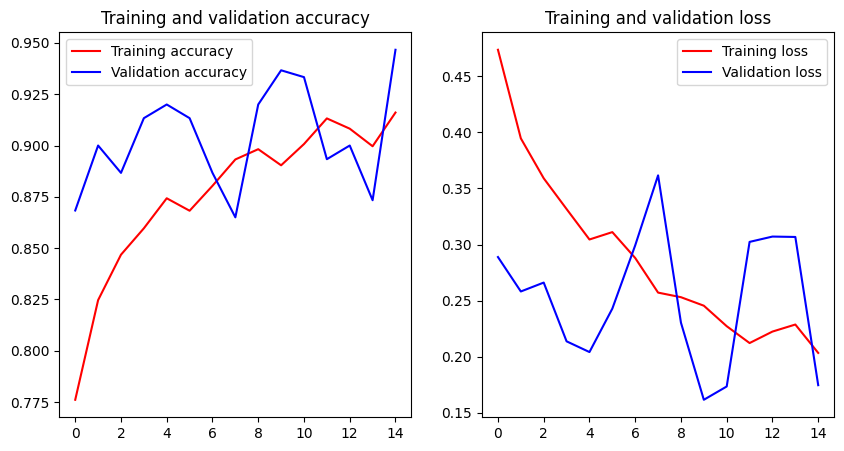

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
